# **Load data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('databsm.csv')

In [3]:
data.head()

,SA,Pore Volume,Id/Ig,C,O,N,Potential,Current,Electrolyte,Cap,B-doped graphene,N-doped graphene,NB-doped graphene,act_carbon,graphene,p-carbon
0,796.0,0.68,1.098901,94.971,1.105,0.000,1.0,0.5,6.0,107.3,0,0,0,0,0,1
1,796.0,0.68,1.098901,94.971,1.105,0.000,1.0,1.0,6.0,105.0,0,0,0,0,0,1
2,779.0,0.48,1.000000,88.174,3.869,0.414,1.0,0.5,6.0,142.8,0,0,0,0,0,1
3,779.0,0.48,1.000000,88.174,3.869,0.414,1.0,1.0,6.0,140.5,0,0,0,0,0,1
4,779.0,0.48,1.000000,88.174,3.869,0.414,1.0,10.0,6.0,112.5,0,0,0,0,0,1


In [4]:
#Get Target data 
y = data[['Cap']]

#Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['Cap'], axis = 1)

In [5]:
X.shape

(493, 15)

In [6]:
y.shape

(493, 1)

In [7]:
print(X[:10])

       SA  Pore Volume     Id/Ig       C      O      N  Potential  Current  \
0   796.0         0.68  1.098901  94.971  1.105  0.000        1.0      0.5   
1   796.0         0.68  1.098901  94.971  1.105  0.000        1.0      1.0   
2   779.0         0.48  1.000000  88.174  3.869  0.414        1.0      0.5   
3   779.0         0.48  1.000000  88.174  3.869  0.414        1.0      1.0   
4   779.0         0.48  1.000000  88.174  3.869  0.414        1.0     10.0   
5   533.0         0.28  1.020408  86.521  4.325  0.430        1.0      0.5   
6   533.0         0.28  1.020408  86.521  4.325  0.430        1.0      1.0   
7   512.0         0.28  1.010101  86.944  4.571  0.578        1.0      0.5   
8   512.0         0.28  1.010101  86.944  4.571  0.578        1.0      1.0   
9  1947.0         1.33  0.930000  94.000  4.900  0.650        1.0      1.0   

   Electrolyte  B-doped graphene  N-doped graphene  NB-doped graphene  \
0          6.0                 0                 0                  

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(394, 15) (99, 15) (394, 1) (99, 1)


In [10]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [11]:
model = RandomForestRegressor(n_estimators=200, random_state = 42)

In [12]:
#Fitting the modelm
model.fit(X_train,y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9012\855957738.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [34]:
model.fit(X_test,y_test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9012\3250627512.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_test,y_test)


RandomForestRegressor(n_estimators=10, random_state=42)

In [64]:
#Training the model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [35]:
y_test_pred = model.predict(X_test)

In [36]:
print (y_test_pred)

[ 28.7        146.252      133.25        36.85       181.325
 151.3        318.22       215.7         64.5        104.91
 102.24       120.8        136.98        75.2        225.6402
 220.907      114.991      102.91       223.5        175.82
 247.3        139.562      260.4802     220.         119.3
 112.822      142.8         56.645      150.1        234.5602
 244.2        245.64       319.6        219.55       153.602
 186.1902     187.519      169.95       257.3        236.96
 234.2086     310.8008     126.         140.5        259.5434
 117.5248     256.3        119.5         33.2        183.05
 251.6        238.8        187.4        115.5        215.7
 275.6        291.3        319.101      288.8        130.
 192.691      173.06       325.2        179.4        241.501
 184.7126     267.7        257.1802     144.8488     111.9
 292.1        329.7        195.55       289.21        15.01357143
 172.08       145.04       213.78        90.68       117.9
 148.071      181.28        86.

In [37]:
y_train_pred = model.predict(X_train)

In [38]:
print(y_train_pred[:10])

[268.441 245.35  198.92  121.072 166.907 164.82  116.43  183.65  165.068
 150.88 ]


In [65]:
print(r2_score(y_test, y_test_pred))

0.8936638497213614


In [82]:
print(r2_score(y_train, y_train_pred))

0.9352995326287423


In [129]:
print(mean_absolute_error(y_train, y_train_pred))

18.146437892460987


In [144]:
print(mean_squared_error(y_train, y_train_pred))

843.0822032616113


In [146]:
#RMSE
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

29.035877862768526


In [147]:
#RMAE
print(np.sqrt(mean_absolute_error(y_train, y_train_pred)))

4.259863600217851


Text(0.5, 0, 'Testing sample data')

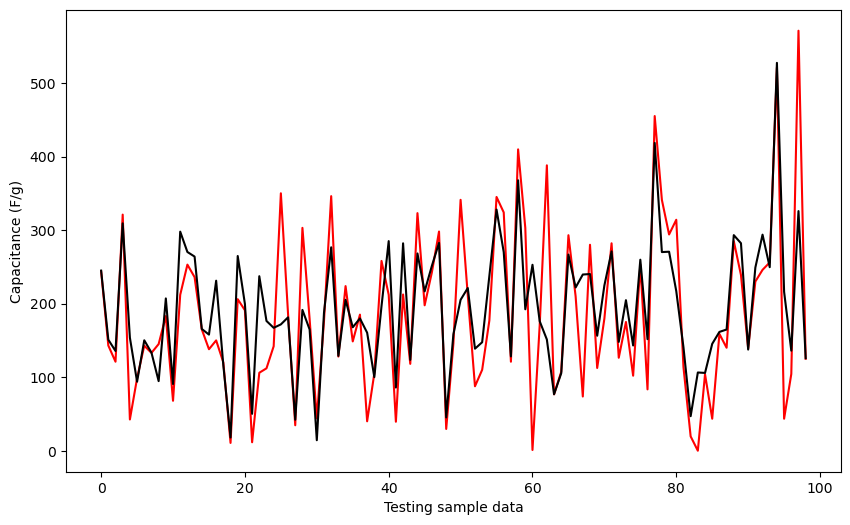

In [136]:
#plotting the actual and predicted data
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10,6)
x = range(len(X_test))

plt.plot(x, y_test, label='Actual', color= 'r', ls='-')
plt.plot(x, y_test_pred, label='Predicted', color= 'k', ls='-')
plt.ylabel('Capacitance (F/g)')
plt.xlabel('Testing sample data')

In [139]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

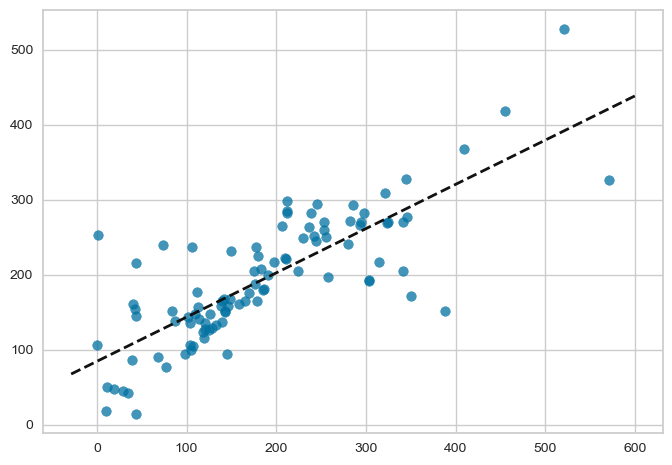

In [140]:
#Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [67]:
#The k-fold cv
from sklearn.model_selection import cross_val_score

In [68]:
score_train = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 10)
score_train

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was pa

array([0.82725195, 0.61380701, 0.4878091 , 0.61376552, 0.60512062,
       0.64758021, 0.393752  , 0.646759  , 0.2234039 , 0.68187213])

In [158]:
print(np.mean(score_train))

0.4627539364574469


In [159]:
from sklearn.model_selection import cross_val_predict
score_test = cross_val_score(model, X_test, y_test, scoring = 'r2', cv = 10)
score_test

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was pa

array([-0.61444329,  0.32801872, -0.37594194,  0.68759108, -0.11136995,
        0.11767474,  0.31065857,  0.81512662,  0.03000861,  0.31734489])

In [160]:
print(np.mean(score_test))

0.15046680558483658


# Model Building

In [13]:
from pprint import pprint

In [14]:
#Create the param
params = {
'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_jobs': 1,
 'oob_score': False,
 'verbose': 0,
 'warm_start': False}

In [15]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [16]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using k fold cross validation, 
# search across 100 different combinations, and use all available cores
model = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_estimators=200,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [17]:
model.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [40]:
def evaluate(model, y_test, y_test_pred):
    predictions = model.predict(y_test)
    errors = abs(predictions - y_test_pred)
    mape = 100 * np.mean(errors / y_test_pred)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
model = RandomForestRegressor(n_estimators = 10, random_state = 42)
model.fit(y_test, y_test_pred)
model_accuracy = evaluate(model, y_test, y_test_pred)

Model Performance
Average Error: 9.4664 degrees.
Accuracy = 93.18%.


In [41]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [0, 'auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [42]:
# Fit the grid search to the data
grid_search.fit(y_test, y_test_pred)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Acer\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Acer\anaconda3\lib\site-packages\j

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [0, 'auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [44]:
best_grid = grid_search.best_estimator_

In [45]:
grid_accuracy = evaluate(best_grid, y_test, y_test_pred)

Model Performance
Average Error: 15.0374 degrees.
Accuracy = 87.46%.


In [46]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [49]:
model.fit(X_test,y_test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9012\3250627512.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_test,y_test)


RandomForestRegressor()

In [50]:
y_test_pred = model.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.8936638497213614


In [52]:
metrics.r2_score(y_test, y_test_pred)

0.8936638497213614

In [53]:
#corelation (r^2)
print(r2_score(y_test,y_test_pred))

0.8936638497213614


In [54]:
#MAE
print(mean_absolute_error(y_test,y_test_pred))

23.26043981481481


In [57]:
#MSE
print(mean_squared_error(y_test,y_test_pred))

966.0179551343075


In [59]:
#RMSE
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

31.080829382986348


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

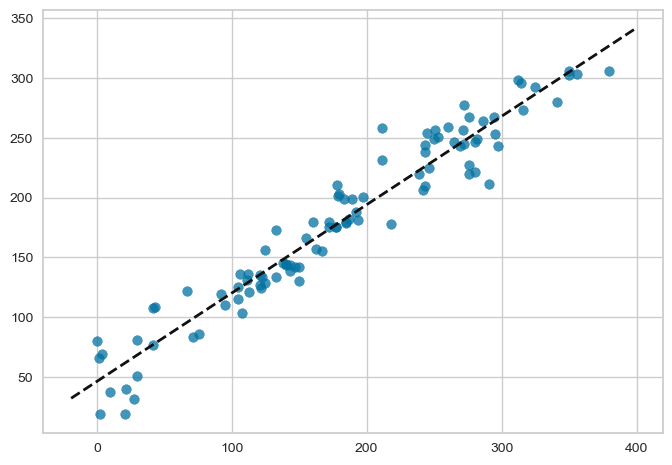

In [62]:
#Plotting
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [97]:
# Assuming you have already defined your target variable 'y'

# Check the type of the target variable
target_type = type(y)

# Print the type of the target variable
print("Target variable type:", target_type)

Target variable type: <class 'pandas.core.series.Series'>


In [99]:
data.isna().sum()

SA                   0
Pore Volume          0
Id/Ig                0
C                    0
O                    0
N                    0
Potential            0
Current              0
Electrolyte          0
Cap                  0
B-doped graphene     0
N-doped graphene     0
NB-doped graphene    0
act_carbon           0
graphene             0
p-carbon             0
dtype: int64